<a href="https://colab.research.google.com/github/buntys2010/Edelweiss-Hackathon-Machine-Learning-Hackerearth/blob/master/Edelweiss_Hackathon_Machine_Learning_Hackerearth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning hackathon by Edelweiss organised by Hackerearth

# Problem statements - Machine Learning – Propensity to Foreclose 

India is a diversified financial sector undergoing rapid expansion, both in terms of strong growth of existing financial services firms and new entities entering the market. The sector comprises commercial banks, insurance companies, non-banking financial companies, co-operatives, pension funds, mutual funds and other smaller financial entities . The Edelweiss Group is one of India's leading diversified financial services company providing a broad range of financial products and services to a substantial and diversified client base that includes corporations, institutions and individuals. Edelweiss's products and services span multiple asset classes and consumer segments across domestic and global geographies. Given the availability of various alternatives across the industry customer has a propensity to move to another financial institution for Balance Transfer. Foreclosure and balance transfer has added to the concerns of NBFCs. Foreclosure means repaying the outstanding loan amount in a single payment instead of with EMIs while balance transfer is transferring outstanding Loan availed from one Bank / Financial Institution to another Bank / Financial Institution, usually on the grounds of better service, top-up on the existing loan, proximity of branch, saving on interest repayments, etc. Losing out on customers on grounds on foreclosure and balance transfer leads to revenue loss. Acquiring a new customer can cost up to five times more than retaining an existing customer and an increase in customer retention by 5% increases profits up to 25%. NBFCs have started taking pro-active measures to ensure this is curbed; and this is where you come in! Objective is primarily to arrive at a propensity to foreclose and balance transfer an existing loan based on lead indicators such as demographics, internal behavior and performance on all credit lines; along with the estimated ‘Time to Foreclose’. May the best algorithm win!

Participants are free to use any openly available data source to further enrich the dataset.

# Data Description

We have provided the following dataset:



1.   Customer demographics
2.   Customer transactions (ie. repayments made by the client)
3.   List of foreclosed customers
4.   Email interaction of the customer with the customer representative

The participants are expected to predict the probability of foreclosure for each of the data points in the test set.

## Import Everything

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import lightgbm as lgb
import xgboost as xgb
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from keras import Sequential
from keras import layers
from keras import backend as K
from keras.layers.core import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.constraints import max_norm
import tensorflow as tf
import keras
from lightgbm import LGBMClassifier

## Read Data and check the heads

---


In [0]:
#@title Default title text
train_df = pd.read_csv("../content/train_df.csv")
test_df=pd.read_csv("../content/test_df.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
train_df.shape

(20012, 49)

In [0]:
train_df.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,CUST_CATEGORYID,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,GROSS_INCOME,NETTAKEHOMEINCOME,BRANCH_PINCODE,FORECLOSURE
0,11220001,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.421934,10.612692,45.0,120,1,...,5.0,33.0,M,M,POSTGRAD,0.0,198375.221829,198375.221829,400070.0,1.0
1,11220002,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,...,5.0,44.0,M,M,POSTGRAD,0.0,242703.982915,242703.982915,400070.0,1.0
2,11220006,12001005.0,3.933395e+06,3.933395e+06,2010-11-01,16.231176,11.549106,358.0,180,5,...,4.0,43.0,M,M,GRAD,0.0,53536.208228,53536.208228,400070.0,1.0
3,11220008,12001007.0,1.002259e+07,1.002259e+07,2010-10-06,13.421934,10.612692,91.0,180,1,...,5.0,33.0,M,M,POSTGRAD,0.0,123370.483661,123370.483661,400070.0,1.0
4,11220010,12001009.0,7.755937e+06,7.755937e+06,2010-10-26,15.606900,10.924830,341.0,180,5,...,4.0,37.0,M,M,UG,0.0,93803.844072,93803.839568,400070.0,1.0


In [0]:
test_df.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,...,CUST_CATEGORYID,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,GROSS_INCOME,NETTAKEHOMEINCOME,BRANCH_PINCODE,FORECLOSURE
0,11220003,12001002.0,4.053499e+06,4.053499e+06,2010-09-06,17.167590,12.485520,360.0,180,5,...,7.0,50.0,M,M,GRAD,0.0,0.000000,0.000000,400070.0,NaN
1,11220004,12001003.0,1.325703e+07,1.325703e+07,2010-09-29,15.606900,10.924830,198.0,180,5,...,4.0,40.0,M,M,GRAD,0.0,365263.511624,365263.516128,400070.0,NaN
2,11220005,12001004.0,1.321140e+07,1.321140e+07,2010-09-06,16.543314,11.861244,142.0,180,5,...,4.0,27.0,M,M,GRAD,0.0,187342.198995,187342.198995,400070.0,NaN
3,11220007,12001006.0,6.155313e+06,6.155313e+06,2010-10-11,16.543314,12.485520,262.0,180,5,...,4.0,48.0,M,M,UG,0.0,49842.149808,49842.145305,400070.0,NaN
4,11220009,12001008.0,9.499284e+06,9.499284e+06,2010-11-10,18.915563,13.609217,52.0,180,5,...,4.0,44.0,M,M,GRAD,0.0,183331.982693,183331.987196,400070.0,NaN


## Lets check Missing Values

In [0]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [0]:
# Missing values statistics of Customers
missing_values = missing_values_table(train_df)
missing_values.head(40)

Your selected dataframe has 49 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
QUALIFICATION,14393,71.9
AGE,14266,71.3
MARITAL_STATUS,14266,71.3
SEX,14265,71.3
NO_OF_DEPENDENT,14063,70.3
BRANCH_PINCODE,14063,70.3
CUST_CONSTTYPE_ID,14020,70.1
CUST_CATEGORYID,14020,70.1
GROSS_INCOME,14020,70.1
NETTAKEHOMEINCOME,14020,70.1


In [0]:
# Missing values statistics of Customers
missing_values = missing_values_table(test_df)
missing_values.head(40)

Your selected dataframe has 49 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
FORECLOSURE,13342,100.0
QUALIFICATION,9564,71.7
MARITAL_STATUS,9484,71.1
AGE,9484,71.1
SEX,9483,71.1
NO_OF_DEPENDENT,9370,70.2
BRANCH_PINCODE,9364,70.2
CUST_CONSTTYPE_ID,9334,70.0
CUST_CATEGORYID,9334,70.0
GROSS_INCOME,9334,70.0


## Delete Some Features with large missing values

In [0]:
#train_df = train_df.drop(['NPA_IN_CURRENT_MONTH','INTEREST_START_DATE','AUTHORIZATIONDATE','LAST_RECEIPT_DATE','DUEDAY'],axis=1)
#test_df = test_df.drop(['NPA_IN_CURRENT_MONTH','INTEREST_START_DATE','AUTHORIZATIONDATE','LAST_RECEIPT_DATE','DUEDAY'],axis=1)

## Lets create some feature genration 

In [0]:
train_df['CUST_CONSTTYPE_ID']=train_df['CUST_CONSTTYPE_ID'].astype(object)
test_df['CUST_CONSTTYPE_ID']=test_df['CUST_CONSTTYPE_ID'].astype(object)

In [0]:
train_df['CUST_CATEGORYID']=train_df['CUST_CATEGORYID'].astype(object)
test_df['CUST_CATEGORYID']=test_df['CUST_CATEGORYID'].astype(object)

In [0]:
#train_df['Is_EXCESS_AVAILABLE'] = train_df['EXCESS_AVAILABLE'].apply(lambda x: 1 if (x!=0) else 0 )
#test_df['Is_EXCESS_AVAILABLE'] = test_df['EXCESS_AVAILABLE'].apply(lambda x: 1 if (x!=0) else 0 )

In [0]:
#train_df['Ratio_ROI'] = train_df['CURRENT_ROI'] / train_df['ORIGNAL_ROI']
#test_df['Ratio_ROI'] = test_df['CURRENT_ROI'] / test_df['ORIGNAL_ROI']

In [0]:
#test_df[test_df['Ratio_ROI'].isna()]

In [0]:
#train_df['BALANCE_EXCESS_Min'] = train_df['BALANCE_EXCESS'].min()
#test_df['BALANCE_EXCESS_Min'] = test_df['BALANCE_EXCESS'].min()

In [0]:
#train_df['BALANCE_EXCESS_Mean'] = train_df['BALANCE_EXCESS'].mean()
#test_df['BALANCE_EXCESS_Mean'] = test_df['BALANCE_EXCESS'].mean()

In [0]:
train_df['BRANCH_PINCODE']=train_df['BRANCH_PINCODE'].astype(object)
test_df['BRANCH_PINCODE']=test_df['BRANCH_PINCODE'].astype(object)

In [0]:
# This feature overfits completly 
#train_df['ROI_Diff']=train_df['CURRENT_ROI'] - train_df['ORIGNAL_ROI'] 
#test_df['ROI_Diff']=test_df['CURRENT_ROI'] - test_df['ORIGNAL_ROI']

In [0]:
#AUC decreased a bit but Confustion matrix output was good

#train_df['REM_TENOR']=train_df['ORIGNAL_TENOR'] - train_df['CURRENT_TENOR']
#test_df['REM_TENOR']=test_df['ORIGNAL_TENOR'] - test_df['CURRENT_TENOR']

In [0]:
train_df['MOB']=train_df['MOB'].astype(object)
test_df['MOB']=test_df['MOB'].astype(object)

In [0]:

train_df['INTEREST_START_DATE']= pd.to_datetime(train_df['INTEREST_START_DATE'])
train_df['AUTHORIZATIONDATE']= pd.to_datetime(train_df['AUTHORIZATIONDATE'])
train_df['LAST_RECEIPT_DATE']= pd.to_datetime(train_df['LAST_RECEIPT_DATE'])


test_df['INTEREST_START_DATE']= pd.to_datetime(test_df['INTEREST_START_DATE'])
test_df['AUTHORIZATIONDATE']= pd.to_datetime(test_df['AUTHORIZATIONDATE'])
test_df['LAST_RECEIPT_DATE']= pd.to_datetime(test_df['LAST_RECEIPT_DATE'])


In [0]:
train_df['INTEREST_year'] = train_df['INTEREST_START_DATE'].dt.year
train_df['INTEREST_day_of_year'] = train_df['INTEREST_START_DATE'].dt.dayofyear
train_df['INTEREST_weekday'] = train_df['INTEREST_START_DATE'].dt.weekday
train_df['INTEREST_week_of_year'] = train_df['INTEREST_START_DATE'].dt.week
train_df['INTEREST_day_of_month'] = train_df['INTEREST_START_DATE'].dt.day
train_df['INTEREST_quarter'] = train_df['INTEREST_START_DATE'].dt.quarter

test_df['INTEREST_year'] = test_df['INTEREST_START_DATE'].dt.year
test_df['INTEREST_day_of_year'] = test_df['INTEREST_START_DATE'].dt.dayofyear
test_df['INTEREST_weekday'] = test_df['INTEREST_START_DATE'].dt.weekday
test_df['INTEREST_week_of_year'] = test_df['INTEREST_START_DATE'].dt.week
test_df['INTEREST_day_of_month'] = test_df['INTEREST_START_DATE'].dt.day
test_df['INTEREST_quarter'] = test_df['INTEREST_START_DATE'].dt.quarter

In [0]:
train_df['AUTHORIZATION_year'] = train_df['AUTHORIZATIONDATE'].dt.year
train_df['AUTHORIZATION_day_of_year'] = train_df['AUTHORIZATIONDATE'].dt.dayofyear
train_df['AUTHORIZATION_weekday'] = train_df['AUTHORIZATIONDATE'].dt.weekday
train_df['AUTHORIZATION_week_of_year'] = train_df['AUTHORIZATIONDATE'].dt.week
train_df['AUTHORIZATION_day_of_month'] = train_df['AUTHORIZATIONDATE'].dt.day
train_df['AUTHORIZATION_quarter'] = train_df['AUTHORIZATIONDATE'].dt.quarter

test_df['AUTHORIZATION_year'] = test_df['AUTHORIZATIONDATE'].dt.year
test_df['AUTHORIZATION_day_of_year'] = test_df['AUTHORIZATIONDATE'].dt.dayofyear
test_df['AUTHORIZATION_weekday'] = test_df['AUTHORIZATIONDATE'].dt.weekday
test_df['AUTHORIZATION_week_of_year'] = test_df['AUTHORIZATIONDATE'].dt.week
test_df['AUTHORIZATION_day_of_month'] = test_df['AUTHORIZATIONDATE'].dt.day
test_df['AUTHORIZATION_quarter'] = test_df['AUTHORIZATIONDATE'].dt.quarter

In [0]:
train_df['LAST_RECEIPT_year'] = train_df['LAST_RECEIPT_DATE'].dt.year
train_df['LAST_RECEIPT_day_of_year'] = train_df['LAST_RECEIPT_DATE'].dt.dayofyear
train_df['LAST_RECEIPT_weekday'] = train_df['LAST_RECEIPT_DATE'].dt.weekday
train_df['LAST_RECEIPT_week_of_year'] = train_df['LAST_RECEIPT_DATE'].dt.week
train_df['LAST_RECEIPT_day_of_month'] = train_df['LAST_RECEIPT_DATE'].dt.day
train_df['LAST_RECEIPT_quarter'] = train_df['LAST_RECEIPT_DATE'].dt.quarter

test_df['LAST_RECEIPT_year'] = test_df['LAST_RECEIPT_DATE'].dt.year
test_df['LAST_RECEIPT_day_of_year'] = test_df['LAST_RECEIPT_DATE'].dt.dayofyear
test_df['LAST_RECEIPT_weekday'] = test_df['LAST_RECEIPT_DATE'].dt.weekday
test_df['LAST_RECEIPT_week_of_year'] = test_df['LAST_RECEIPT_DATE'].dt.week
test_df['LAST_RECEIPT_day_of_month'] = test_df['LAST_RECEIPT_DATE'].dt.day
test_df['LAST_RECEIPT_quarter'] = test_df['LAST_RECEIPT_DATE'].dt.quarter

In [0]:
train_df = train_df.drop(['EXCESS_ADJUSTED_AMT','NPA_IN_CURRENT_MONTH','INTEREST_START_DATE','AUTHORIZATIONDATE','LAST_RECEIPT_DATE'],axis=1)
test_df = test_df.drop(['EXCESS_ADJUSTED_AMT','NPA_IN_CURRENT_MONTH','INTEREST_START_DATE','AUTHORIZATIONDATE','LAST_RECEIPT_DATE'],axis=1)

## Lets do one hot encoding 

In [0]:
train_df = pd.get_dummies(train_df)
test_df_lgb = pd.get_dummies(test_df)

In [0]:
train_df = train_df.drop(['AGREEMENTID','CUSTOMERID'],axis=1)
test_df_lgb = test_df_lgb.drop(['AGREEMENTID','CUSTOMERID'],axis=1)

In [0]:
train_df.head()

,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,...,BRANCH_PINCODE_627005.0,BRANCH_PINCODE_628002.0,BRANCH_PINCODE_631501.0,BRANCH_PINCODE_632007.0,BRANCH_PINCODE_635109.0,BRANCH_PINCODE_636004.0,BRANCH_PINCODE_637001.0,BRANCH_PINCODE_639001.0,BRANCH_PINCODE_641002.0,BRANCH_PINCODE_641601.0
0,1.171011e+07,1.171011e+07,13.421934,10.612692,45.0,120,1,5.595992e+04,5.595992e+04,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.929025e+07,1.929025e+07,13.734072,10.612692,137.0,180,1,1.005046e+05,1.005046e+05,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3.933395e+06,3.933395e+06,16.231176,11.549106,358.0,180,5,2.735910e+05,2.735910e+05,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.002259e+07,1.002259e+07,13.421934,10.612692,91.0,180,1,3.317720e+06,3.317720e+06,0.0,...,0,0,0,0,0,0,0,0,0,0
4,7.755937e+06,7.755937e+06,15.606900,10.924830,341.0,180,5,1.497571e+06,1.497571e+06,0.0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
test_df_lgb.head()

,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,...,BRANCH_PINCODE_627005.0,BRANCH_PINCODE_628002.0,BRANCH_PINCODE_631501.0,BRANCH_PINCODE_632007.0,BRANCH_PINCODE_635109.0,BRANCH_PINCODE_636004.0,BRANCH_PINCODE_637001.0,BRANCH_PINCODE_639001.0,BRANCH_PINCODE_641002.0,BRANCH_PINCODE_641601.0
0,4.053499e+06,4.053499e+06,17.167590,12.485520,360.0,180,5,0.000000e+00,0.000000e+00,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.325703e+07,1.325703e+07,15.606900,10.924830,198.0,180,5,2.844173e+04,2.844173e+04,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.321140e+07,1.321140e+07,16.543314,11.861244,142.0,180,5,0.000000e+00,0.000000e+00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,6.155313e+06,6.155313e+06,16.543314,12.485520,262.0,180,5,4.514479e+06,4.514479e+06,0.0,...,0,0,0,0,0,0,0,0,0,0
4,9.499284e+06,9.499284e+06,18.915563,13.609217,52.0,180,5,1.508017e+06,1.508017e+06,0.0,...,0,0,0,0,0,0,0,0,0,0


## Align train and test dataframes 

In [0]:
test_df_lgb = test_df_lgb.drop('FORECLOSURE',axis=1)

In [0]:
# Align train and test

train_labels = train_df['FORECLOSURE']

# Align the training and testing data, keep only columns present in both dataframes
train_df, test_df_lgb = train_df.align(test_df_lgb, join = 'inner', axis = 1)

# Add the target back in
train_df['FORECLOSURE'] = train_labels

print('Training Features shape: ', train_df.shape)
print('Testing Features shape: ', test_df_lgb.shape)

Training Features shape:  (20012, 381)
Testing Features shape:  (13342, 380)


In [0]:
#train_df.to_csv("weka_train.csv",index=False)
#test_df.to_csv("weka_test.csv",index=False)

## Lets do train_test_Split

In [0]:
train_df = train_df.reindex(
    np.random.permutation(train_df.index))

In [0]:
train_df=train_df.fillna(0)
test_df= test_df.fillna(0)

In [0]:
y = train_df['FORECLOSURE']
X = train_df.drop('FORECLOSURE',axis=1)

In [0]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10,stratify=y.values)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_df_lgb = sc.transform(test_df_lgb)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


##Traditional algos - Baseline

In [0]:
from sklearn.linear_model import LogisticRegression


In [0]:
Log = RandomForestClassifier(n_estimators=5000,class_weight='balanced',max_depth=7,min_samples_leaf=10,min_weight_fraction_leaf=0.0001)

In [0]:
Log.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0001,
            n_estimators=5000, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = Log.predict(X_test)

In [0]:
confusion_matrix(y_test,y_pred)

array([[3378,  266],
       [  11,  348]])

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.9481813122804227

## Create a model LightGBM

In [0]:
def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":20000, # changed from 20000
       "reg_alpha" :0.5005020213127344,
       "reg_lambda":0.45121616279208887, # changed from 0.3
        #'lambda_l2':0.6, # changed from 0.6
      # "n_jobs":-1,
       "colsample_bytree":0.8970523178797932, #changed from 0.8
      # "min_child_weight":0.99,
       "subsample_for_bin":260000,
       "min_data_in_leaf":45, #changed form 100
       #"nthread":4,
       "metric" : "auc",
       "num_leaves" : 138,  #best upto now 128
       "learning_rate" :0.035742378218536576,  #changed from 0.001
       #"verbosity" : -1,
       #"seed": 120,
       #"max_bin":250, #changed from 200
       #'max_depth':7, # changed from 7
       #'min_gain_to_split':0.2, #Changed from 0.09
       #'scale_pos_weight':3.5, #Changed from 3
       # 'bagging_fraction':0.7, #changed from 0.8
       # 'feature_fraction':0.99,
        #'tree_learner':'voting'
        'class_weight':'balanced'
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=50, 
                      evals_result=evals_result)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [0]:
pred_test, model, evals_result = run_lgb(X_train, X_test, y_train, y_test, test_df_lgb)
print("LightGBM Training Completed...")

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[50]	training's auc: 0.999128	valid_1's auc: 0.996316
[100]	training's auc: 0.999722	valid_1's auc: 0.997013
[150]	training's auc: 0.999967	valid_1's auc: 0.997642
[200]	training's auc: 0.999999	valid_1's auc: 0.997816
[250]	training's auc: 1	valid_1's auc: 0.997893
[300]	training's auc: 1	valid_1's auc: 0.99797
Early stopping, best iteration is:
[236]	training's auc: 1	valid_1's auc: 0.997881
LightGBM Training Completed...


## Lets try and Tune HyperParameter ,Refer blog

Using Hyperopt library to find best hyper parameters

In [0]:
# Refer https://github.com/WillKoehrsen/hyperparameter-optimization/blob/master/Bayesian%20Hyperparameter%20Optimization%20of%20Gradient%20Boosting%20Machine.ipynb

train = pd.DataFrame(X_train)
test = pd.DataFrame(X_test)

# Extract the labels and format properly
train_labels = np.array(y_train.astype(np.int32)).reshape((-1,))
test_labels = np.array(y_test.astype(np.int32)).reshape((-1,))

# Drop the unneeded columns
#train = train.drop(columns = ['FORECLOSURE'],axis=1)


# Convert to numpy array for splitting in cross validation
features = np.array(train)
test_features = np.array(test)
labels = train_labels[:]

print('Train shape: ', train.shape)
print('Test shape: ', test.shape)
train.head()

Train shape:  (16009, 380)
Test shape:  (4003, 380)


,0,1,2,3,4,5,6,7,8,9,...,370,371,372,373,374,375,376,377,378,379
0,-0.354702,-0.362445,1.714958,1.778090,0.831828,1.265841,-0.277332,-0.119002,-0.118752,-0.028603,...,-0.06385,-0.067682,-0.040333,-0.054839,-0.041102,-0.051288,-0.054263,-0.071312,-0.109302,-0.063355
1,-0.352963,-0.351566,-0.819104,-0.969440,1.715829,1.265841,-0.277332,-0.114779,-0.114524,-0.028603,...,-0.06385,-0.067682,-0.040333,-0.054839,-0.041102,-0.051288,-0.054263,-0.071312,-0.109302,-0.063355
2,-0.218917,-0.216420,0.076777,0.235617,-0.208172,-0.076116,-0.277332,-0.117218,-0.116966,-0.028603,...,-0.06385,-0.067682,-0.040333,-0.054839,-0.041102,-0.051288,-0.054263,-0.071312,-0.109302,-0.063355
3,-0.246301,-0.244028,-1.228649,-1.451463,0.190495,-0.076116,-0.277332,-0.109837,-0.109575,-0.028603,...,-0.06385,-0.067682,-0.040333,-0.054839,-0.041102,-0.051288,-0.054263,-0.071312,-0.109302,-0.063355
4,3.363542,3.395419,-0.358365,-0.848935,3.518497,1.265841,-0.277332,-0.027511,-0.027148,-0.028603,...,-0.06385,-0.067682,-0.040333,-0.054839,-0.041102,-0.051288,-0.054263,-0.071312,-0.109302,-0.063355


In [0]:
train_set = lgb.Dataset(features, label = labels)

In [0]:
# Modeling
import lightgbm as lgb

# Evaluation of the model
from sklearn.model_selection import KFold

MAX_EVALS = 500
N_FOLDS = 10

In [0]:
# Model with default hyperparameters
model = lgb.LGBMClassifier()
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
from sklearn.metrics import roc_auc_score
from timeit import default_timer as timer

start = timer()
model.fit(features, labels)
train_time = timer() - start

predictions = model.predict_proba(test_features)[:, 1]
auc = roc_auc_score(test_labels, predictions)

print('The baseline score on the test set is {:.4f}.'.format(auc))
print('The baseline training time is {:.4f} seconds'.format(train_time))

The baseline score on the test set is 0.9974.
The baseline training time is 2.9697 seconds


In [0]:
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

def objective(params, n_folds = N_FOLDS):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization"""
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    # Retrieve the subsample if present otherwise set to 1.0
    subsample = params['boosting_type'].get('subsample', 1.0)
    
    # Extract the boosting type
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        params[parameter_name] = int(params[parameter_name])
    
    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(params, train_set, num_boost_round = 2000, nfold = n_folds, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)
    
    run_time = timer() - start
    
    # Extract the best score
    best_score = np.max(cv_results['auc-mean'])
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)

    # Write to the csv file ('a' means append)
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params, ITERATION, n_estimators, run_time])
    
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'iteration': ITERATION,
            'estimators': n_estimators, 
            'train_time': run_time, 'status': STATUS_OK}


In [0]:
from hyperopt import hp
from hyperopt.pyll.stochastic import sample

In [0]:
# Create the learning rate
learning_rate = {'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.05))}

In [0]:
# Discrete uniform distribution
num_leaves = {'num_leaves': hp.quniform('num_leaves', 30, 200, 1)}

In [0]:
# boosting type domain 
boosting_type = {'boosting_type': hp.choice('boosting_type', 
                                            [{'boosting_type': 'gbdt', 'subsample': hp.uniform('subsample', 0.5, 1)}, 
                                             {'boosting_type': 'dart', 'subsample': hp.uniform('subsample', 0.5, 1)},
                                             {'boosting_type': 'goss', 'subsample': 1.0}])}

# Draw a sample
params = sample(boosting_type)
params

{'boosting_type': {'boosting_type': 'goss', 'subsample': 1.0}}

In [0]:
# Retrieve the subsample if present otherwise set to 1.0
subsample = params['boosting_type'].get('subsample', 1.0)

# Extract the boosting type
params['boosting_type'] = params['boosting_type']['boosting_type']
params['subsample'] = subsample

params

{'boosting_type': 'goss', 'subsample': 1.0}

In [0]:
# Define the search space
space = {
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'boosting_type': hp.choice('boosting_type', [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                                 {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                                 {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 30, 250, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'scale_pos_weight':hp.quniform('scale_pos_weight', 1, 10, 1),
    'bagging_fraction':hp.quniform('bagging_fraction', 0.1, 1.0, 0.1),
    #'max_depth': hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'max_bin':hp.choice('max_bin', np.arange(1, 450, dtype=int)),
    'lambda_l2':hp.quniform('lambda_l2', 0.0, 1.0, 0.1)
}

In [0]:
# Sample from the full space
x = sample(space)

# Conditional logic to assign top-level keys
subsample = x['boosting_type'].get('subsample', 1.0)
x['boosting_type'] = x['boosting_type']['boosting_type']
x['subsample'] = subsample

x

{'bagging_fraction': 0.30000000000000004,
 'boosting_type': 'goss',
 'class_weight': None,
 'colsample_bytree': 0.8062121513192683,
 'lambda_l2': 0.9,
 'learning_rate': 0.012598418121390169,
 'max_bin': 242,
 'min_child_samples': 375.0,
 'num_leaves': 204.0,
 'reg_alpha': 0.8352685137612773,
 'reg_lambda': 0.8955823083124309,
 'scale_pos_weight': 7.0,
 'subsample': 1.0,
 'subsample_for_bin': 240000.0}

In [0]:

x = sample(space)
subsample = x['boosting_type'].get('subsample', 1.0)
x['boosting_type'] = x['boosting_type']['boosting_type']
x['subsample'] = subsample
x

{'bagging_fraction': 1.0,
 'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.6148470107658849,
 'lambda_l2': 0.7000000000000001,
 'learning_rate': 0.08982841846703167,
 'max_bin': 16,
 'min_child_samples': 390.0,
 'num_leaves': 77.0,
 'reg_alpha': 0.293731843692861,
 'reg_lambda': 0.9764520123069593,
 'scale_pos_weight': 2.0,
 'subsample': 0.5646721690792957,
 'subsample_for_bin': 100000.0}

In [0]:
from hyperopt import tpe

# optimization algorithm
tpe_algorithm = tpe.suggest

In [0]:
from hyperopt import Trials

# Keep track of results
bayes_trials = Trials()

In [0]:
# File to save first results
out_file = '../content/gbm_trials.csv'
of_connection = open(out_file, 'w')
writer = csv.writer(of_connection)

# Write the headers to the file
writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time'])
of_connection.close()

In [0]:
from hyperopt import fmin

In [0]:
%%capture

# Global variable
global  ITERATION

ITERATION = 0

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials, rstate = np.random.RandomState(50))

In [0]:
# Sort the trials with lowest loss (highest AUC) first
bayes_trials_results = sorted(bayes_trials.results, key = lambda x: x['loss'])
bayes_trials_results[:2]

[]

In [0]:
results = pd.read_csv('../content/gbm_trials.csv')

# Sort with best scores on top and reset index for slicing
results.sort_values('loss', ascending = True, inplace = True)
results.reset_index(inplace = True, drop = True)
results.head()

,loss,params,iteration,estimators,train_time


In [0]:
import ast

# Convert from a string to a dictionary
ast.literal_eval(results.loc[0, 'params'])

KeyError: ignored

In [0]:
# Extract the ideal number of estimators and hyperparameters
best_bayes_estimators = int(results.loc[0, 'estimators'])
best_bayes_params = ast.literal_eval(results.loc[0, 'params']).copy()

# Re-create the best model and train on the training data
best_bayes_model = lgb.LGBMClassifier(n_estimators=best_bayes_estimators, n_jobs = -1, 
                                       objective = 'binary', random_state = 50, **best_bayes_params)
best_bayes_model.fit(features, labels)

KeyError: ignored

In [0]:
# Evaluate on the testing data 
preds = best_bayes_model.predict_proba(test_features)[:, 1]
print('The best model from Bayes optimization scores {:.5f} AUC ROC on the test set.'.format(roc_auc_score(test_labels, preds)))
print('This was achieved after {} search iterations'.format(results.loc[0, 'iteration']))

NameError: ignored

## Lets Eval the model with Confusion metrix and AUC 

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = model.predict(X_test)

In [0]:
confusion_matrix(y_test,y_pred.round())

array([[3629,   15],
       [  24,  335]])

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred.round())

0.9543753382520661

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3644
         1.0       0.87      0.93      0.90       359

   micro avg       0.98      0.98      0.98      4003
   macro avg       0.93      0.96      0.95      4003
weighted avg       0.98      0.98      0.98      4003



## Lets create submission to make sure we are not overfitting

In [0]:
pred = model.predict(test_df_lgb)

In [0]:
test_df['FORECLOSURE'] = pred

In [0]:
sub = test_df[['AGREEMENTID','FORECLOSURE']]

In [0]:
sub.to_csv("New_Sub_V_16.csv",index=False)

## Lets Analise Feature importance

In [0]:
!pip install shap

    100% |████████████████████████████████| 225kB 9.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/bf/26/bd/912db1314f1cef0171d9b7f128dd01e8b8c92ed8d0062e632d
Successfully built shap


In [0]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [0]:
%time 

#shap_values = shap.TreeExplainer(model).shap_values(X)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


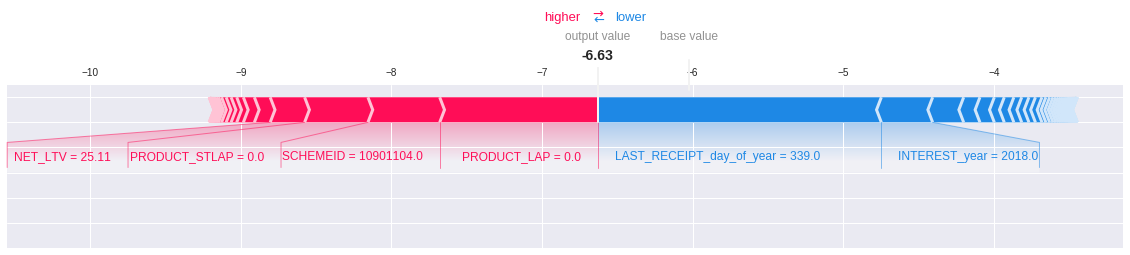

In [0]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:],matplotlib=True)

In [0]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

/usr/local/lib/python3.6/dist-packages/shap/plots/force.py:111: UserWarning: shap.force_plot is slow many thousands of rows, try subsampling your data.
  warnings.warn("shap.force_plot is slow many thousands of rows, try subsampling your data.")


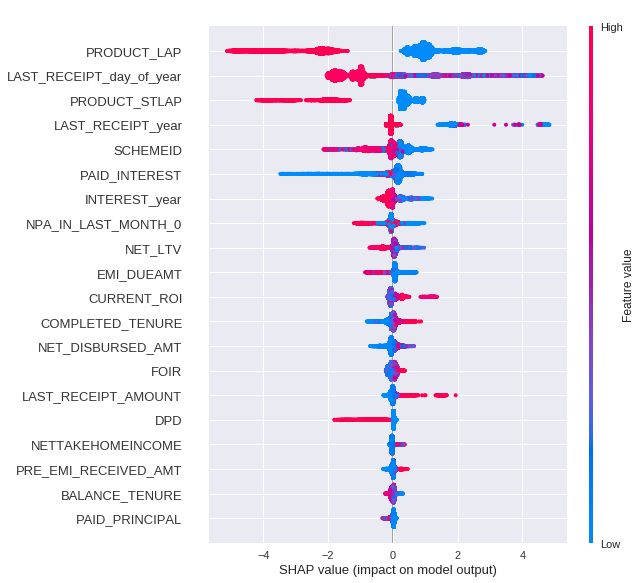

In [0]:
shap.summary_plot(shap_values, X)

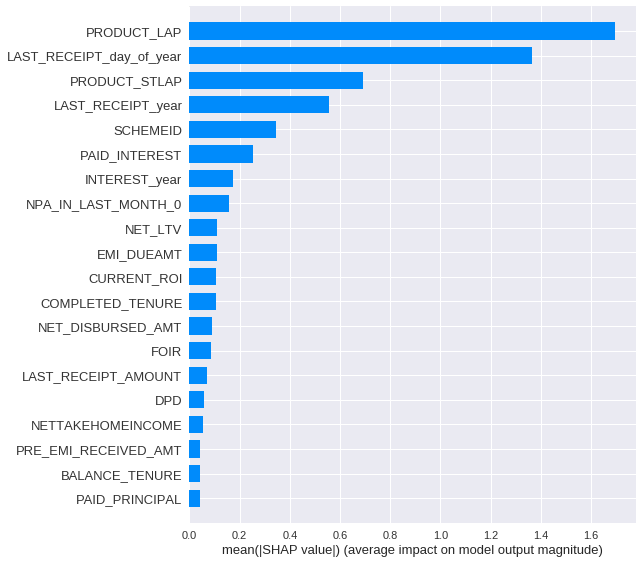

In [0]:
shap.summary_plot(shap_values, X, plot_type="bar")

## Lets try XG Booster and have a average of both the models

In [0]:
import xgboost

In [0]:
def run_xgb(X_train, X_test, y_train, y_test, test_df_lgb):
    params = {'objective': 'binary:logistic', 
              'booster' : "gbtree",
              'eval_metric':'auc',
              'eta': 0.225,
              'max_depth': 10, 
              'subsample': 0.9500000000000001, #changed from 0.6
              'colsample_bytree': 0.65,
              'lambda':0.3,
              'gamma':1.0,
              'max_delta_step':3,
              'min_child_weight':2.0,
              #'alpha':0.001,
              'random_state': 42,
              'scale_pos_weight':10.15,
              'max_bin':250, #changed from 450
              'silent': True}
    
    tr_data = xgb.DMatrix(X_train, y_train)
    va_data = xgb.DMatrix(X_test, y_test)
    
    watchlist = [(tr_data, 'train'), (va_data, 'valid')]
    
    model_xgb = xgb.train(params, tr_data, 271, watchlist, maximize=False, early_stopping_rounds = 10, verbose_eval=10)
    
    #cv = xgb.cv(params, tr_data, 271, nfold=5, early_stopping_rounds=10, verbose_eval=10)
    
    dtest = xgb.DMatrix(test_df_lgb)
    xgb_pred_y = model_xgb.predict(dtest, ntree_limit=model_xgb.best_ntree_limit)
    
    return xgb_pred_y, model_xgb

In [0]:
# Training XGB
pred_test_xgb, model_xgb = run_xgb(X_train, X_test, y_train, y_test, test_df_lgb)
print("XGB Training Completed...")

[0]	train-auc:0.99234	valid-auc:0.982184
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 10 rounds.
[10]	train-auc:0.999855	valid-auc:0.996634
[20]	train-auc:0.999999	valid-auc:0.997267
[30]	train-auc:1	valid-auc:0.9975
[40]	train-auc:1	valid-auc:0.997854
[50]	train-auc:1	valid-auc:0.998005
[60]	train-auc:1	valid-auc:0.99795
Stopping. Best iteration:
[50]	train-auc:1	valid-auc:0.998005

XGB Training Completed...


In [0]:
dtest1 = xgb.DMatrix(X_test)
y_pred_X = model_xgb.predict(dtest1)

In [0]:
confusion_matrix(y_test,y_pred_X.round())

array([[2706,   27],
       [  15,  254]])

In [0]:
test_df['FORECLOSURE']= pred_test_xgb

In [0]:
sub1 = test_df[['AGREEMENTID','FORECLOSURE']]

In [0]:
sub1.to_csv("XGB_Sub_V_8.csv",index=False)

In [0]:
pred_test[1]

0.9992024940816789

In [0]:
pred_test_xgb[1]

0.9997217

In [0]:
Combine = (pred_test * 0.7 + pred_test_xgb * 0.3 ) 

In [0]:
test_df['FORECLOSURE']=Combine

In [0]:
sub_combine = test_df[['AGREEMENTID','FORECLOSURE']]

In [0]:
sub_combine.to_csv("XGB_LGB_Comb_V_2.csv",index=False)

## Auto Hyper Parameter tunning with hyperopt for XGBooster

In [0]:
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import xgboost as xgb
import sklearn

from sklearn.metrics import log_loss
from sklearn import preprocessing


In [0]:
def load_train(X,y):
    train = X
    labels = y
    return train.values, labels.astype('int32')


def load_test(X_test):
    test = X_test
    return test.values

In [0]:
def score(params):
    print ("Training with params : ")
    print (params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)
    # watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_round)
    predictions = model.predict(dvalid)
    score = log_loss(y_test, predictions)
    print ("\tScore {0}\n\n".format(score))
    return {'loss': score, 'status': STATUS_OK}

In [0]:
def optimize(trials):
    space = {
             'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
             'eta' : hp.quniform('eta', 0.025, 0.5, 0.025),
             'max_depth' : hp.choice('max_depth', np.arange(1, 14, dtype=int)),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
             'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
             'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
             'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'eval_metric': 'auc',
             'objective': 'binary:logistic',
             'nthread' : 6,
             'silent' : 1
             }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)

    print (best)

In [0]:
X, y = load_train(X,y)

AttributeError: ignored

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10,stratify=y.values)

In [0]:
trials = Trials()

optimize(trials)

Training with params : 
{'colsample_bytree': 1.0, 'eta': 0.30000000000000004, 'eval_metric': 'auc', 'gamma': 0.75, 'max_depth': 4, 'min_child_weight': 4.0, 'n_estimators': 535.0, 'nthread': 6, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8500000000000001}
	Score 0.04791411970210309


Training with params : 
{'colsample_bytree': 0.55, 'eta': 0.225, 'eval_metric': 'auc', 'gamma': 0.6000000000000001, 'max_depth': 12, 'min_child_weight': 4.0, 'n_estimators': 970.0, 'nthread': 6, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8}
	Score 0.046172723169486334


Training with params : 
{'colsample_bytree': 0.65, 'eta': 0.17500000000000002, 'eval_metric': 'auc', 'gamma': 0.75, 'max_depth': 3, 'min_child_weight': 2.0, 'n_estimators': 165.0, 'nthread': 6, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.75}
	Score 0.047327221268986086


Training with params : 
{'colsample_bytree': 0.8500000000000001, 'eta': 0.1, 'eval_metric': 'auc', 'gamma': 0.60000000000000